Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Load the csv file and show first 5 rows.

In [6]:
df = pd.read_csv("sales_data.csv")

# 2. Print out basic information. Use `info` and `describe`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41 non-null     object
 1   region      41 non-null     object
 2   category    41 non-null     object
 3   product     41 non-null     object
 4   units_sold  41 non-null     int64 
 5   unit_price  41 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ KB


,units_sold,unit_price
count,41.000000,41.000000
mean,43.512195,304.390244
std,25.995309,309.245443
min,5.000000,20.000000
25%,22.000000,80.000000
50%,40.000000,150.000000
75%,60.000000,500.000000
max,100.000000,900.000000


# 3. Select only the `date` and `product` columns and display the first 10 rows.

,date,product
0,2021-01-01,Laptop
1,2021-01-01,Chair
2,2021-01-01,Smartphone
3,2021-01-01,T-Shirt
4,2021-01-01,Desk
5,2021-01-02,Couch
6,2021-01-02,Headphones
7,2021-01-02,Jeans
8,2021-01-02,Jacket
9,2021-01-03,Smartphone


# 4. Filter the rows where `units_sold` is greater than 50. Display these rows.

In [8]:
df[df['units_sold'] > 50]

,date,region,category,product,units_sold,unit_price
2,2021-01-01,South,Electronics,Smartphone,60,500
3,2021-01-01,East,Clothing,T-Shirt,55,20
6,2021-01-02,East,Electronics,Headphones,90,150
9,2021-01-03,North,Electronics,Smartphone,75,500
12,2021-01-03,South,Clothing,T-Shirt,100,20
13,2021-01-04,North,Electronics,Headphones,60,150
15,2021-01-04,East,Clothing,Jeans,65,45
19,2021-01-05,North,Clothing,T-Shirt,80,20
22,2021-01-06,West,Electronics,Headphones,85,150
25,2021-01-07,South,Furniture,Chair,60,80


# 5. Create a new column in df called `revenue` that is `units_sold * unit_price`. Sort by `revenue` in descending order and show the top 5 rows.

In [9]:
df["revenue"] = df["units_sold"] * df["unit_price"]
df.sort_values("revenue", ascending=False).head(10)

,date,region,category,product,units_sold,unit_price,revenue
9,2021-01-03,North,Electronics,Smartphone,75,500,37500
2,2021-01-01,South,Electronics,Smartphone,60,500,30000
40,2021-01-10,North,Electronics,Smartphone,60,500,30000
30,2021-01-08,East,Electronics,Smartphone,55,500,27500
34,2021-01-09,West,Electronics,Headphones,95,150,14250
6,2021-01-02,East,Electronics,Headphones,90,150,13500
22,2021-01-06,West,Electronics,Headphones,85,150,12750
13,2021-01-04,North,Electronics,Headphones,60,150,9000
25,2021-01-07,South,Furniture,Chair,60,80,4800
15,2021-01-04,East,Clothing,Jeans,65,45,2925


# 6. Group the data by `category` and calculate the total `revenue` for each `category`. Which `category` has the highest total `revenue`?

In [10]:
temp = df.groupby("category")["revenue"].sum()
temp

category
Clothing         9425
Electronics    174500
Furniture        4800
Name: revenue, dtype: int64

# 7. Group the data by `region` and `category` and find the average `unit_price`

# 8. Simulate missing values in `units_sold`, count missing values, and fill them with the mean

In [14]:
import numpy as np

df.loc[df.sample[3].index, "units_sold"] = np.nan

TypeError: 'method' object is not subscriptable

# 9. Filter to show rows where `category` is "Electronics" and `region` is either "North" or "East". Display the first 5 rows.

,date,region,category,product,units_sold,unit_price,revenue
0,2021-01-01,North,Electronics,Laptop,25.0,900,22500
6,2021-01-02,East,Electronics,Headphones,90.0,150,13500
9,2021-01-03,North,Electronics,Smartphone,75.0,500,37500
13,2021-01-04,North,Electronics,Headphones,60.0,150,9000
18,2021-01-05,East,Electronics,Laptop,18.0,900,16200


# 10. Create a pivot table showing sum of `units_sold` with `category` as rows and `region` as columns.

region,East,North,South,West
category,,,,
Clothing,246.210526,150.0,198.210526,108.0
Electronics,163.000000,253.0,108.210526,192.0
Furniture,94.000000,69.0,85.000000,105.0


# 11. Create a `discount_df`, then merge it with df on `category`.

,date,region,category,product,units_sold,unit_price,revenue,discount_rate
0,2021-01-01,North,Electronics,Laptop,25.000000,900,22500,0.05
1,2021-01-01,North,Furniture,Chair,45.000000,80,3600,0.10
2,2021-01-01,South,Electronics,Smartphone,43.210526,500,30000,0.05
3,2021-01-01,East,Clothing,T-Shirt,43.210526,20,1100,0.15
4,2021-01-01,West,Furniture,Desk,30.000000,200,6000,0.10


# 12. Create a `discounted_revenue` column: `revenue * (1 - discount_rate)`. Round using apply.

,date,region,category,product,units_sold,unit_price,revenue,discount_rate,discounted_revenue
0,2021-01-01,North,Electronics,Laptop,25.000000,900,22500,0.05,21375
1,2021-01-01,North,Furniture,Chair,45.000000,80,3600,0.10,3240
2,2021-01-01,South,Electronics,Smartphone,43.210526,500,30000,0.05,28500
3,2021-01-01,East,Clothing,T-Shirt,43.210526,20,1100,0.15,935
4,2021-01-01,West,Furniture,Desk,30.000000,200,6000,0.10,5400


# 13. Plot total daily (group by the date) `revenue` over time as a line chart.

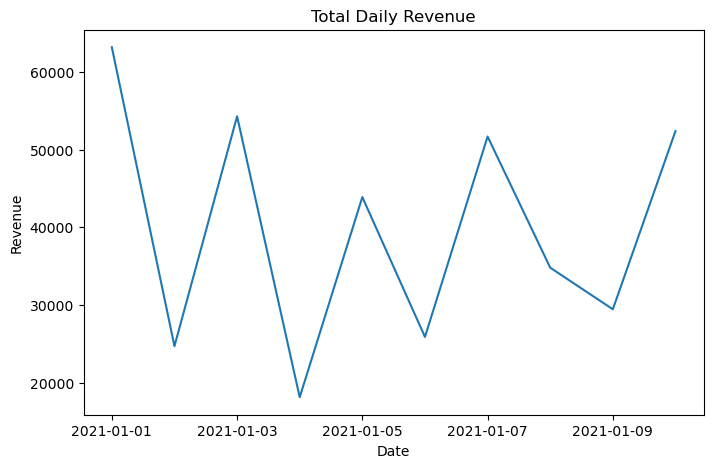

# 14. Create a histogram of `units_sold`.

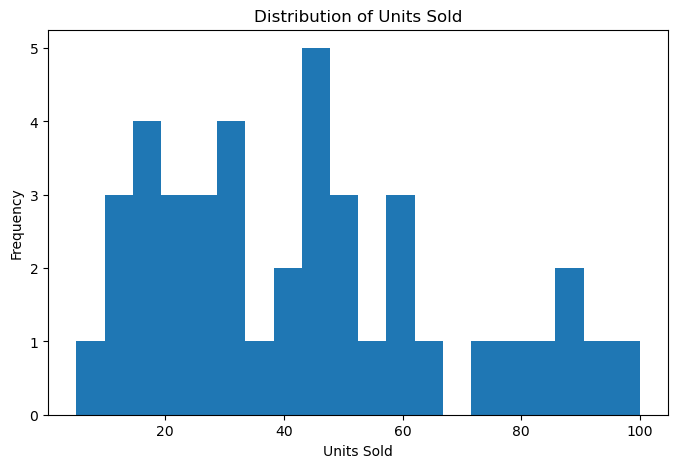

# 15. Create a scatter plot of `units_sold` (x-axis) vs `revenue` (y-axis).

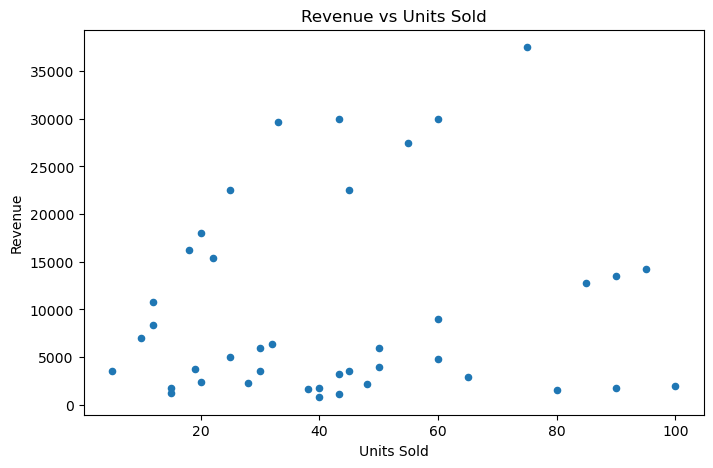

# H1. Select the first 5 rows and the first 3 columns of df using iloc.

,date,region,category
0,2021-01-01,North,Electronics
1,2021-01-01,North,Furniture
2,2021-01-01,South,Electronics
3,2021-01-01,East,Clothing
4,2021-01-01,West,Furniture


# H2. Select all rows where the `region` is "North" and only the `date`, `product`, and `units_sold` columns using loc.

In [15]:
df.loc[df['region'] == "North", ['date', 'product', 'units_sold']]

,date,product,units_sold
9,2021-01-03,Smartphone,75
13,2021-01-04,Headphones,60
19,2021-01-05,T-Shirt,80
40,2021-01-10,Smartphone,60


# H3. Set the `date` column as the index of the DataFrame, then reset it back to default indexing.

,region,category,product,units_sold,unit_price,revenue,discount_rate,discounted_revenue
date,,,,,,,,
2021-01-01,North,Electronics,Laptop,25.000000,900,22500,0.05,21375
2021-01-01,North,Furniture,Chair,45.000000,80,3600,0.10,3240
2021-01-01,South,Electronics,Smartphone,43.210526,500,30000,0.05,28500
2021-01-01,East,Clothing,T-Shirt,43.210526,20,1100,0.15,935
2021-01-01,West,Furniture,Desk,30.000000,200,6000,0.10,5400


,date,region,category,product,units_sold,unit_price,revenue,discount_rate,discounted_revenue
0,2021-01-01,North,Electronics,Laptop,25.000000,900,22500,0.05,21375
1,2021-01-01,North,Furniture,Chair,45.000000,80,3600,0.10,3240
2,2021-01-01,South,Electronics,Smartphone,43.210526,500,30000,0.05,28500
3,2021-01-01,East,Clothing,T-Shirt,43.210526,20,1100,0.15,935
4,2021-01-01,West,Furniture,Desk,30.000000,200,6000,0.10,5400


# H4. Rename the column `unit_price` to `price_per_unit` and `units_sold` to `quantity_sold`. Don't do it inplace (for consistency). Show first 6 entries

,date,region,category,product,quantity_sold,price_per_unit,revenue,discount_rate,discounted_revenue
0,2021-01-01,North,Electronics,Laptop,25.000000,900,22500,0.05,21375
1,2021-01-01,North,Furniture,Chair,45.000000,80,3600,0.10,3240
2,2021-01-01,South,Electronics,Smartphone,43.210526,500,30000,0.05,28500
3,2021-01-01,East,Clothing,T-Shirt,43.210526,20,1100,0.15,935
4,2021-01-01,West,Furniture,Desk,30.000000,200,6000,0.10,5400
5,2021-01-02,South,Furniture,Couch,10.000000,700,7000,0.10,6300


# H5. Create a copy of `df` called `df_copy` and drop the `discounted_revenue` column from it. Show first 5 entries.

,date,region,category,product,units_sold,unit_price,revenue,discount_rate
0,2021-01-01,North,Electronics,Laptop,25.000000,900,22500,0.05
1,2021-01-01,North,Furniture,Chair,45.000000,80,3600,0.10
2,2021-01-01,South,Electronics,Smartphone,43.210526,500,30000,0.05
3,2021-01-01,East,Clothing,T-Shirt,43.210526,20,1100,0.15
4,2021-01-01,West,Furniture,Desk,30.000000,200,6000,0.10


# H6. Create a new column `high_revenue` that is `True` if `revenue > 5000`, else `False`.

,date,region,category,product,units_sold,unit_price,revenue,discount_rate,discounted_revenue,high_revenue
0,2021-01-01,North,Electronics,Laptop,25.000000,900,22500,0.05,21375,True
1,2021-01-01,North,Furniture,Chair,45.000000,80,3600,0.10,3240,False
2,2021-01-01,South,Electronics,Smartphone,43.210526,500,30000,0.05,28500,True
3,2021-01-01,East,Clothing,T-Shirt,43.210526,20,1100,0.15,935,False
4,2021-01-01,West,Furniture,Desk,30.000000,200,6000,0.10,5400,True


# H7. Find the distinct values of `region` and count how many distinct values there are.

Distinct regions: ['North' 'South' 'East' 'West']
Number of distinct regions: 4


# H8. Sort `df` first by `region` (ascending), and then by `revenue` (descending).

,date,region,category,product,units_sold,unit_price,revenue,discount_rate,discounted_revenue,high_revenue
30,2021-01-08,East,Electronics,Smartphone,55.0,500,27500,0.05,26125,True
18,2021-01-05,East,Electronics,Laptop,18.0,900,16200,0.05,15390,True
6,2021-01-02,East,Electronics,Headphones,90.0,150,13500,0.05,12825,True
33,2021-01-09,East,Furniture,Couch,12.0,700,8400,0.10,7560,True
24,2021-01-06,East,Furniture,Desk,32.0,200,6400,0.10,5760,True


# H9. Using `loc`, for all rows where `category` is "Clothing" and `revenue > 4000`, set `discount_rate` to 0.2.

,date,region,category,product,units_sold,unit_price,revenue,discount_rate,discounted_revenue,high_revenue
0,2021-01-01,North,Electronics,Laptop,25.000000,900,22500,0.05,21375,True
1,2021-01-01,North,Furniture,Chair,45.000000,80,3600,0.10,3240,False
2,2021-01-01,South,Electronics,Smartphone,43.210526,500,30000,0.05,28500,True
3,2021-01-01,East,Clothing,T-Shirt,43.210526,20,1100,0.15,935,False
4,2021-01-01,West,Furniture,Desk,30.000000,200,6000,0.10,5400,True
5,2021-01-02,South,Furniture,Couch,10.000000,700,7000,0.10,6300,True
6,2021-01-02,East,Electronics,Headphones,90.000000,150,13500,0.05,12825,True
7,2021-01-02,West,Clothing,Jeans,40.000000,45,1800,0.15,1530,False
8,2021-01-02,North,Clothing,Jacket,20.000000,120,2400,0.15,2040,False
9,2021-01-03,North,Electronics,Smartphone,75.000000,500,37500,0.05,35625,True


# H10. Count how many times each `product` occurs in the DataFrame.

Laptop        5
Chair         5
Smartphone    5
T-Shirt       5
Jacket        5
Desk          4
Couch         4
Headphones    4
Jeans         4
Name: product, dtype: int64